In [18]:
# Task 5: Movie Review Sentiment Analysis (Beginners & Experienced Interns)

import nltk
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
# Download necessary NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

# Load the movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
random.shuffle(documents)

# Define a function to preprocess the documents
def preprocess_words(words):
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    return words

# Preprocess the documents
documents = [(preprocess_words(doc), category) for doc, category in documents]

# Convert the documents to strings
document_strings = [" ".join(doc) for doc, category in documents]

# Create a CountVectorizer
vectorizer = CountVectorizer(max_features=2000)

# Fit and transform the data
X = vectorizer.fit_transform(document_strings).toarray()

# Get the labels
y = [category for doc, category in documents]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='pos')
recall = recall_score(y_test, y_pred, pos_label='pos')
f1 = f1_score(y_test, y_pred, pos_label='pos')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Define a function to predict sentiment
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_words(text):
    stop_words = set(stopwords.words('english'))

    # Tokenize using split (basic approach)
    words = text.split()

    # Remove non-alphabetic words and stopwords
    words = [word.lower() for word in words if word.isalpha() and word not in stop_words]
    return words

# Ask the user for a movie review and predict its sentiment

def predict_sentiment(text):
    # Preprocess the input text using the new method
    text = preprocess_words(text)
    text_string = " ".join(text)  # Join words back into a single string

    # Transform the text and predict sentiment
    text_features = vectorizer.transform([text_string]).toarray()
    prediction = classifier.predict(text_features)

    return prediction[0]
user_review = input("Enter a movie review: ")
print("The sentiment of your review is:", predict_sentiment(user_review))




[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.8
Precision: 0.8088235294117647
Recall: 0.8009708737864077
F1 Score: 0.8048780487804879
Enter a movie review: kill
The sentiment of your review is: neg


In [20]:
import os

# Check if the directory exists, if not create it
directory = '/content/drive/MyDrive/Colab_Datasets'
if not os.path.exists(directory):
    os.makedirs(directory)


In [21]:
data.to_csv('/content/drive/MyDrive/Colab_Datasets/mall_customers.csv', index=False)


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


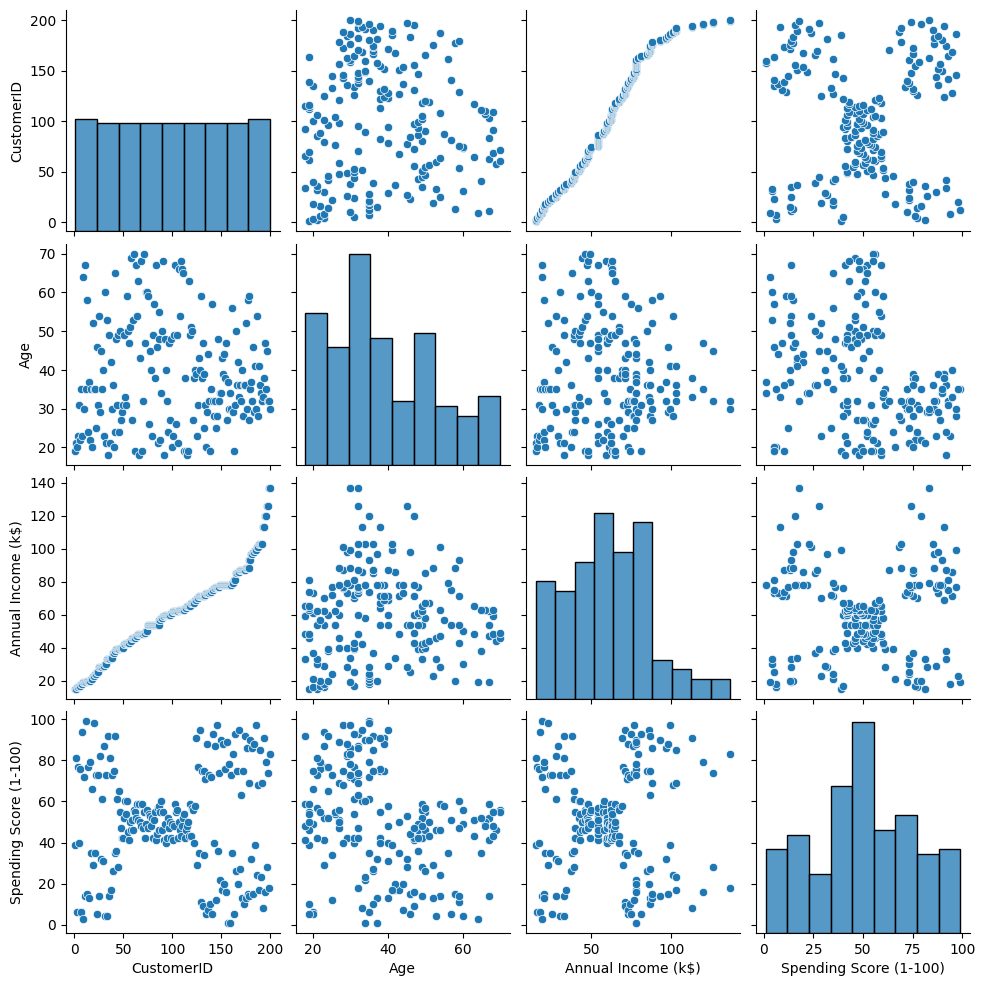

[[-1.42456879 -1.73899919 -0.43480148 -1.12815215]
 [-1.28103541 -1.73899919  1.19570407 -1.12815215]
 [-1.3528021  -1.70082976 -1.71591298  0.88640526]
 [-1.13750203 -1.70082976  1.04041783  0.88640526]
 [-0.56336851 -1.66266033 -0.39597992  0.88640526]]


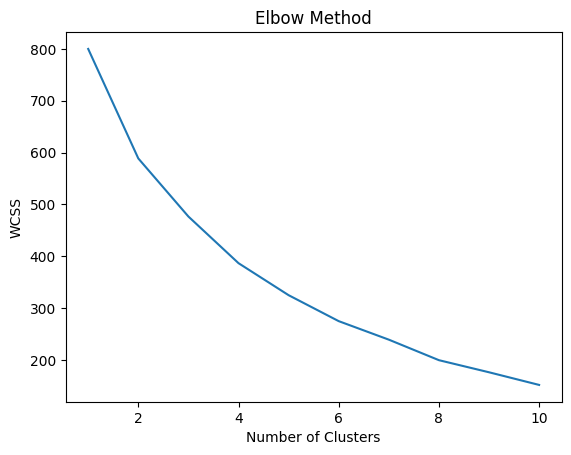

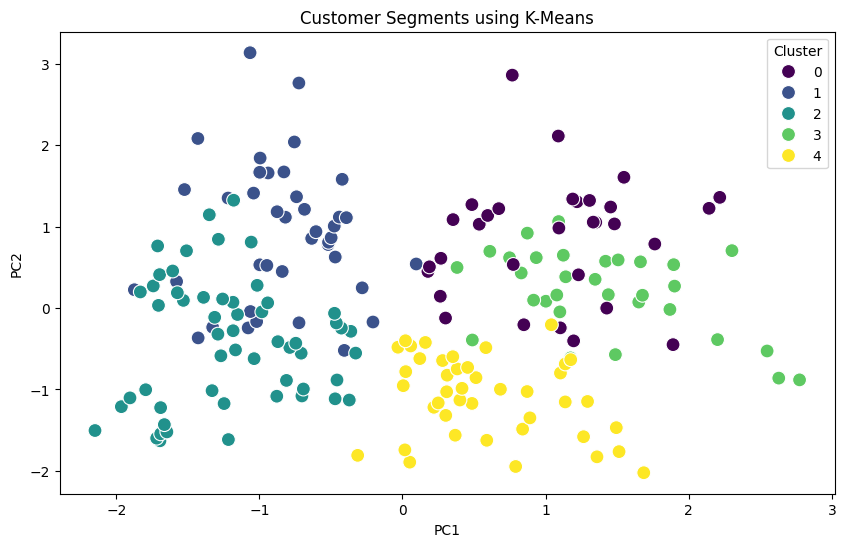

               Age  Annual Income (k$)  Spending Score (1-100)    Gender
Cluster                                                                 
0        40.419355           90.000000               15.741935  0.451613
1        28.250000           62.000000               71.675000  0.000000
2        28.392857           60.428571               68.178571  1.000000
3        55.903226           48.774194               38.806452  0.000000
4        49.142857           46.333333               39.619048  1.000000


In [17]:
#Task 4: Customer Segmentation Using Clustering (Beginners & Experienced Interns)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')  # Adjust the file path if needed

# Display the first few rows
print(data.head())

# Check for missing values and data types
print(data.info())

# Perform EDA to understand the data
sns.pairplot(data)
plt.show()
from sklearn.preprocessing import StandardScaler

# Drop any irrelevant columns (if any)
data = data.drop(['CustomerID'], axis=1)

# Convert categorical data into numerical data (e.g., 'Gender')
data['Gender'] = data['Genre'].map({'Male': 0, 'Female': 1})  # ✅ correct column name

data.columns = data.columns.str.strip()  # Removes any leading/trailing spaces


# Strip spaces from column names (optional but good)
data.columns = data.columns.str.strip()

# Fix categorical gender column
data['Gender'] = data['Genre'].map({'Male': 0, 'Female': 1})
data = data.drop(['Genre'], axis=1)  # Drop original string column if needed


# Now apply the scaler safely
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


print(data_scaled[:5])
from sklearn.cluster import KMeans

# Elbow method to determine the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Try different values of K (1 to 10 clusters)
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# From the elbow plot, choose the optimal number of clusters (e.g., 5 clusters)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = y_kmeans
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = y_kmeans

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)
plt.title('Customer Segments using K-Means')
plt.show()
# Analyze each cluster
cluster_summary = data.groupby('Cluster').mean()

print(cluster_summary)
from sklearn.cluster import AgglomerativeClustering

# Apply AgglomerativeClustering (Hierarchical)
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

y_hc = hc.fit_predict(data_scaled)

# Add cluster labels to the dataset
data['Cluster_HC'] = y_hc


In [22]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("fake_or_real_news.csv")
df = df[['text', 'label']]  # Keep only relevant columns
df.dropna(inplace=True)
df.head()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(preprocess)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text']).toarray()
y = df['label'].map({'FAKE': 1, 'REAL': 0})  # Convert labels to binary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
def predict_news(news_text):
    cleaned = preprocess(news_text)
    vect = vectorizer.transform([cleaned]).toarray()
    prediction = model.predict(vect)[0]
    return "FAKE" if prediction == 1 else "REAL"
predict_news("Donald trump is new pm of usa.")


Saving fake_or_real_news.csv to fake_or_real_news (2).csv
Accuracy: 0.8926598263614838


'FAKE'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
